In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
k = 10
num_problems = 2000

q_star = np.random.normal(0,1, (num_problems, k))
arms = [0] * k

for i in range(k):
    arms[i] = np.random.normal(q_star[0][i], 1, num_problems)

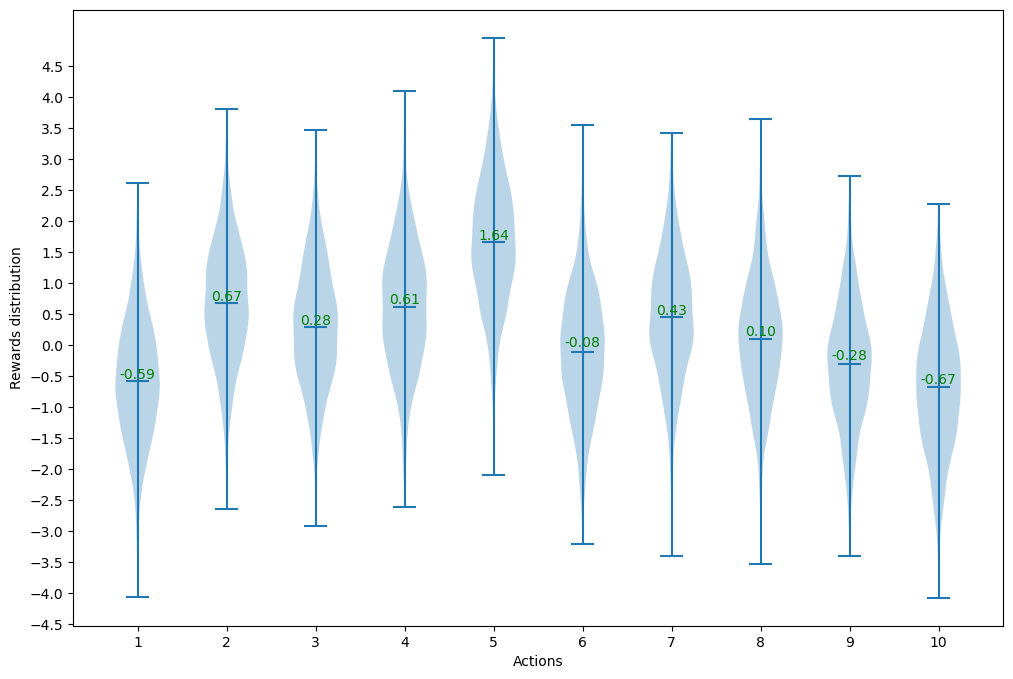

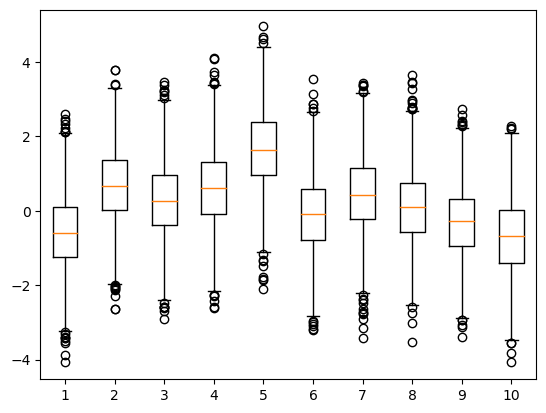

In [3]:
plt.figure(figsize = (12, 8))
plt.ylabel('Rewards distribution')
plt.xlabel('Actions')
plt.xticks(range(1, 11))
plt.yticks(np.arange(-5, 5, 0.5))

plt.violinplot(arms, showmeans = True, showextrema= True)
medians = [np.median(arms[i]) for i in range(10)]

for i, median in enumerate(medians, start = 1):
  plt.text(i, median, f'{median:.2f}', ha= 'center', va= 'bottom', fontsize= 10, color= 'green')

plt.show()

plt.boxplot(arms)
plt.show()

In [4]:
def bandit(action, problem):
  return np.random.normal(q_star[problem, action],1)

In [5]:
def simple_max(Q, N, t):
  return np.random.choice(np.flatnonzero(Q == Q.max()))

In [6]:
def simple_bandit(k, epsilon, steps, initial_Q, alpha = 0, argmax_fuc = simple_max):
  rewards = np.zeros(steps)
  actions = np.zeros(steps)

  for i in tqdm(range(num_problems)):
    Q =  np.ones(k)
    N = np.zeros(k)
    best_action = np.argmax(q_star[i])
    for t in range(steps):
      if np.random.rand() < epsilon:
        a = np.random.randint(k)
      else:
        a = argmax_fuc(Q, N, t)
      reward = bandit(a, i)
      N[a] += 1
      if alpha > 0:
        Q[a] =  Q[a] + (reward - Q[a]) * alpha
      else:
        Q[a] = Q[a] + (reward - Q[a]) / N[a]
      rewards[t] += reward
      if a == best_action:
        actions[t] += 1
  return np.divide(rewards, num_problems), np.divide(actions, num_problems)


In [7]:
ep_0, ac_0 = simple_bandit(k=10, epsilon = 0, steps = 1000, initial_Q=0)
ep_01, ac_01 = simple_bandit(k=10, epsilon = 0.01, steps = 1000, initial_Q=0)
ep_1, ac_1 = simple_bandit(k=10, epsilon = 0.1, steps = 1000, initial_Q=0)

100%|██████████| 2000/2000 [01:27<00:00, 22.99it/s]


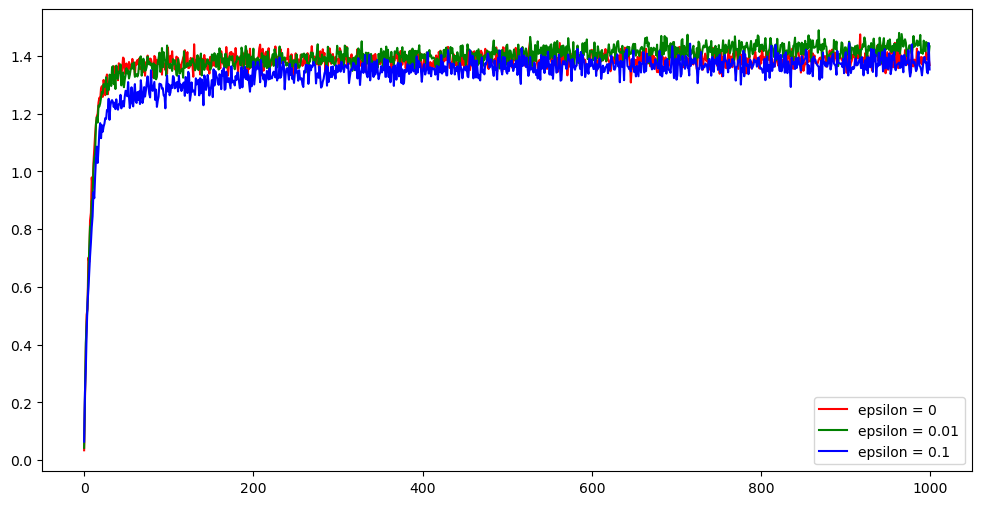

In [8]:
plt.figure(figsize=(12,6))
plt.plot(ep_0, 'r', label = 'epsilon = 0')
plt.plot(ep_01, 'g', label = 'epsilon = 0.01')
plt.plot(ep_1, 'b', label = 'epsilon = 0.1')
plt.legend()
plt.show()

In [9]:
def ucb(Q, N, t):
  c =2
  if N.min() == 0:
    return np.random.choice(np.flatnonzero(N == N.min()))

  m = Q + c * np.sqrt(np.divide(np.log(t),N))
  return np.argmax(m)

In [10]:
ucb_2, ac_ucb_2 = simple_bandit(k=10, epsilon = 0, steps = 1000, initial_Q=0, argmax_fuc = ucb)

100%|██████████| 2000/2000 [00:56<00:00, 35.15it/s]


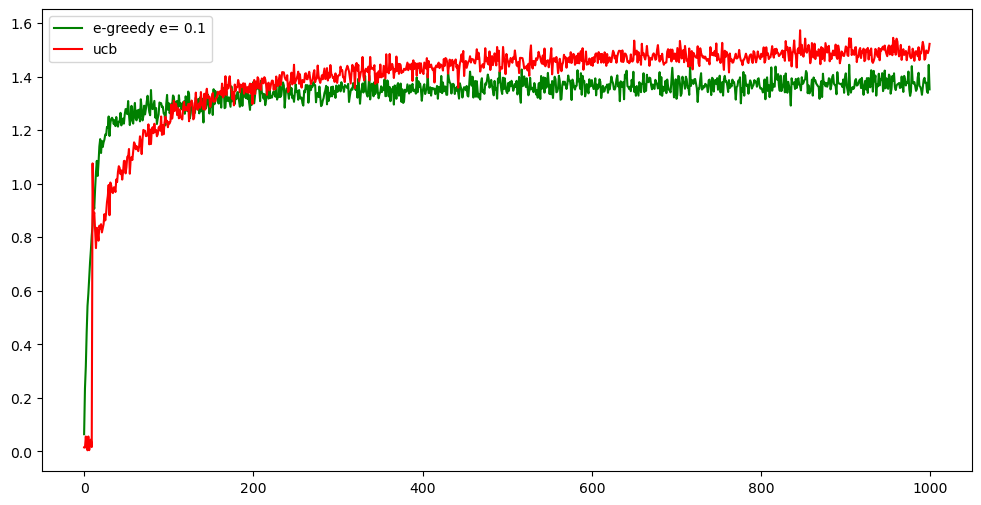

In [11]:
plt.figure(figsize=(12,6))
plt.plot(ep_1, 'g', label = 'e-greedy e= 0.1')
plt.plot(ucb_2, 'r', label = 'ucb')
plt.legend()
plt.show()